In [2]:
import matplotlib.pylab as plt
import numpy as np
import scipy.io as sio
import netCDF4 as nc

from salishsea_tools.nowcast import (research_VENUS)
from salishsea_tools import viz_tools

import baroclinic as bc
import os
%matplotlib inline

In [3]:
strucs_notmasked = {}

path = '/ocean/nsoontie/MEOPAR/TidalEllipseData/'
names_notmasked = { 'CODAR': 'CODAR/CODAR_region_baroclinic_20141126_20150426.mat',
          'BP': 'BP_region_baroclinic_20141126_20150426.mat',
         'VictoriaSill': 'VictoriaSill_region_baroclinic_20141126_20150426.mat',
         'JuandeFuca': 'JuandeFuca_region_baroclinic_20141126_20150426.mat'
         }

for name in names_notmasked:
    data = sio.loadmat(os.path.join(path, names_notmasked[name]))
    strucs_notmasked[name] = data['datastruc']

In [4]:
strucs = {}

path = '/ocean/nsoontie/MEOPAR/TidalEllipseData/'
names = { 'CODAR': 'CODAR/CODAR_region_baroclinic_20141126_20150426_masked.mat',
          'BP': 'BP_region_baroclinic_20141126_20150426_masked.mat',
         'VictoriaSill': 'VictoriaSill_region_baroclinic_20141126_20150426_masked.mat',
         'JuandeFuca': 'JuandeFuca_region_baroclinic_20141126_20150426_masked.mat'
         }

for name in names:
    data = sio.loadmat(os.path.join(path, names[name]))
    strucs[name] = data['datastruc']

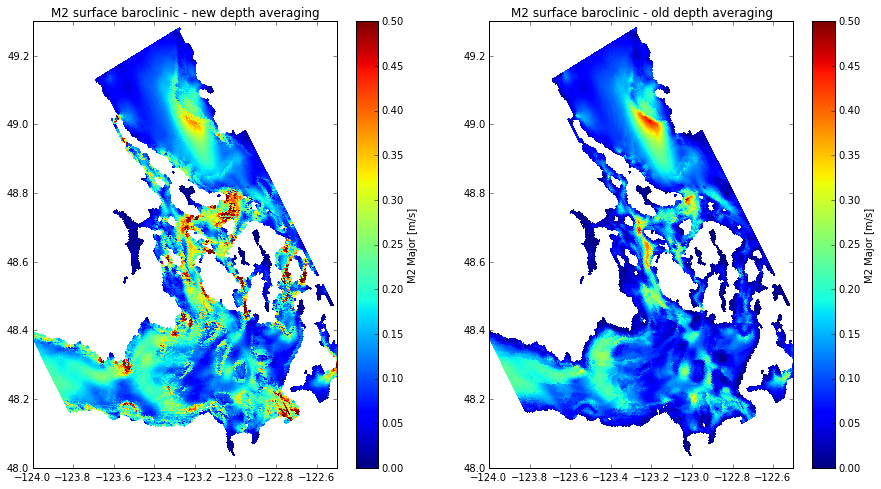

In [11]:
fig,axs=plt.subplots(1,2, figsize=(15,8))
d=0
count=0
for name in names:
    ax=axs[0]
    major, minor, phase , inc= bc.get_constituent('M2', strucs[name])
    lons = strucs[name]['lons'][0,0]
    lats = strucs[name]['lats'][0,0]
    
    mesh = ax.pcolormesh(lons, lats, major[:,:,d],vmin=0, vmax=0.5)
    if count==0:
        cbar = plt.colorbar(mesh, ax=ax)
        cbar.set_label('M2 Major [m/s]')
        ax.set_title('M2 surface baroclinic - new depth averaging')
    ax.set_xlim([-124,-122.5])
    ax.set_ylim([48,49.3])
    
    ax=axs[1]
    major, minor, phase , inc= bc.get_constituent('M2', strucs_notmasked[name])
    lons = strucs_notmasked[name]['lons'][0,0]
    lats = strucs_notmasked[name]['lats'][0,0]
    
    mesh = ax.pcolormesh(lons, lats, major[:,:,d],vmin=0, vmax=0.5)
    if count==0:
        cbar = plt.colorbar(mesh, ax=ax)
        cbar.set_label('M2 Major [m/s]')
    ax.set_title('M2 surface baroclinic - old depth averaging')
    count=count+1
    ax.set_xlim([-124,-122.5])
    ax.set_ylim([48,49.3])
    